In [282]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from fancyimpute import KNN

In [283]:
os.chdir("E:/data scientist/project edwiser/project 3")

In [284]:
data=pd.read_excel("dataset.xls")
data=pd.DataFrame(data)
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [285]:
#convert varable to proper type
data["Reason for absence"]=data["Reason for absence"].astype('category')
data["Month of absence"]=data["Month of absence"].astype('category')
data["Day of the week"]=data["Day of the week"].astype('category')
data["Seasons"]=data["Seasons"].astype('category')
data["Son"]=data["Son"].astype('category')
data["Social drinker"]=data["Social drinker"].astype('category')
data["Social smoker"]=data["Social smoker"].astype('category')
data["Pet"]=data["Pet"].astype('category')
# change the name of columns
data=data.rename(columns={'Reason for absence':"reason_for_absence",'Month of absence':"month_of_absence",'Day of the week':"Day_of_the_week",'Social drinker':"social_drinker",'Social smoker':"social_smoker",'Transportation expense':"transportation_expense",'Distance from Residence to Work':"distance_from_residence_to_work",'Service time':"service_time",'Work load Average/day ':"work_load_average_day",'Hit target':"hit_target",'Disciplinary failure':"disciplinary_failure",'Body mass index':"body_mass_index",'Absenteeism time in hours':"absenteeism_time_in_hours"})


In [286]:
#Checking for missing value
data.isnull().sum()    #no missing value is there
#imputing with KNN
data=pd.DataFrame(KNN(k = 3).complete(data),columns= data.columns)


Imputing row 1/740 with 0 missing, elapsed time: 0.139
Imputing row 101/740 with 1 missing, elapsed time: 0.140
Imputing row 201/740 with 0 missing, elapsed time: 0.141
Imputing row 301/740 with 0 missing, elapsed time: 0.142
Imputing row 401/740 with 0 missing, elapsed time: 0.142
Imputing row 501/740 with 0 missing, elapsed time: 0.143
Imputing row 601/740 with 0 missing, elapsed time: 0.143
Imputing row 701/740 with 0 missing, elapsed time: 0.144


ID
min=  -19.5
max=  56.5
transportation_expense
min=  57.5
max=  381.5
distance_from_residence_to_work
min=  -35.0
max=  101.0
service_time
min=  -1.5
max=  26.5
Age
min=  16.875
max=  53.875
work_load_average_day
min=  176410.5
max=  349918.5
hit_target
min=  85.5
max=  105.5
Weight
min=  39.0
max=  119.0
Height
min=  164.5
max=  176.5
body_mass_index
min=  3.0
max=  59.0
absenteeism_time_in_hours
min=  -43.0
max=  77.0


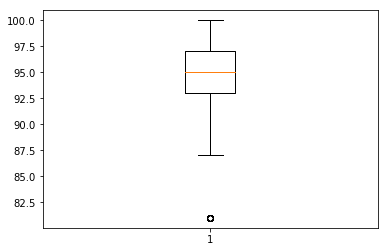

In [287]:
%matplotlib inline
#checking outliers with boxplot of numeric varables And replacing with max value
#storing numeric varables

plt.boxplot(data['hit_target'])

numer=["ID","transportation_expense","distance_from_residence_to_work","service_time","Age","work_load_average_day","hit_target","Weight","Height","body_mass_index","absenteeism_time_in_hours"]
for i in numer:
    print(i)
    q75, q25= np.percentile(data.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(1.5*iqr)
    max=q75+(1.5*iqr)
    print("min= ",min)
    print("max= ", max)
    data[data.loc[:,i]<=min]=min
    data[data.loc[:,i]>=max]=max



In [288]:
#Feature Selection
hh=["absenteeism_time_in_hours"]
data=data.drop(['Weight','Seasons','Day_of_the_week'],axis=1)
data[data.loc[:,hh]==0]=1


In [290]:
data=data.astype(int)
data

,ID,reason_for_absence,month_of_absence,transportation_expense,distance_from_residence_to_work,service_time,Age,work_load_average_day,hit_target,disciplinary_failure,Education,Son,social_drinker,social_smoker,Pet,Height,body_mass_index,absenteeism_time_in_hours
0,11,26,7,289,36,13,33,239554,97,0,1,2,1,0,1,172,30,4
1,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
2,3,23,7,179,51,18,38,239554,97,0,1,0,1,0,0,170,31,2
3,7,7,7,279,5,14,39,239554,97,0,1,2,1,1,0,168,24,4
4,11,23,7,289,36,13,33,239554,97,0,1,2,1,0,1,172,30,2
5,3,23,7,179,51,18,38,239554,97,0,1,0,1,0,0,170,31,2
6,10,22,7,354,52,3,28,239554,97,0,1,1,1,0,4,172,27,8
7,20,23,7,260,50,11,36,239554,97,0,1,4,1,0,0,168,23,4
8,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
9,1,22,7,235,11,14,37,239554,97,0,3,1,0,0,1,172,29,8


In [291]:
#Sampling technique.......divide the data in test and train 
train,test=train_test_split(data,test_size=0.2)



In [309]:
#model building
# decision tree algorithm
treemodel=DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:17],train.iloc[:,17])

pred_value=treemodel.predict(test.iloc[:,0:17])

def mape(truevalue,predvalue):
    #ab=abs(predicted-testvalue)
    #meanerror=round(np.mean(ab),2)
    return np.mean(np.abs((truevalue-predvalue)/truevalue))*100

pred_value=pred_value.astype(int)
mape(test.iloc[:,17],pred_value)

# mape =  85.89 
# mae  =  2.38
# mse  =  12.004
# rmse =  3.46


62.35279922779922

In [312]:
from sklearn.ensemble import RandomForestRegressor

rfor=RandomForestRegressor(n_estimators=5000).fit(train.iloc[:,0:17],train.iloc[:,17])
predval=rfor.predict(test.iloc[:,0:17])


predval=predval.astype(int)
mape(test.iloc[:,17],predval)

# mape =  67.30 
# mae  =  2.47
# mse  =  15.39
# rmse =  3.92

55.14820624195623

In [315]:
test.iloc[:,17]

95      3
634     4
11      8
737     1
118     2
578     2
490     4
179     3
501     1
265     1
116    59
208    59
506     8
259     4
688    59
391    16
44     59
720     3
349     8
69      2
156     8
656     8
476     8
425    16
560     3
321     1
614     2
255    59
695     8
557     3
       ..
196     8
304     2
287    59
178    16
40      2
600     2
289     8
622    59
13      1
477     2
692    59
183     1
365     8
421     8
250     8
172     8
186    59
319     8
483     4
163    40
83      8
80      1
218    59
594    59
23      4
665     8
333     1
730    16
443     2
551     5
Name: absenteeism_time_in_hours, Length: 148, dtype: int32

In [316]:
#linear Regression

lnmodel=sm.OLS(train.iloc[:,17],train.iloc[:,0:17]).fit()
lnmodel
pred=lnmodel.predict(test.iloc[:,0:17])
pred=pred.astype(int)
mape(test.iloc[:,17],pred)

# mape =  83.05 
# mae  =  2.71
# mse  =  17.67
# rmse =  4.20

84.759063883799